In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dns.name
import json
from typing import Literal
import os
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.dates as mdates
from datetime import datetime, timedelta
from IPython.display import clear_output
import preprocessfns as fns

In [19]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
pd.set_option('display.max_colwidth', None)

### HTTPS RR and ECH: apex and www
We read apex and www DNS HTTPS RR records and count the records that has ECH configurations.
If you want to plot for the latest data beyond the demo dates (2023-05-08, 2024-09-30), please run `scpt_ech.py` and set up **recompute=True**.


In [22]:
recompute=False

In [23]:
# Time range beginning to end
start_d = datetime(2023,5,8)
end_d = datetime(2024,10,1)
ndays = (end_d - start_d).days
date_l0 = [start_d + timedelta(days=i) for i in range(ndays)]
print(date_l0[0], date_l0[-1])

2023-05-08 00:00:00 2024-09-30 00:00:00


### Read HTTPS RR ECH

In [24]:
ech_apex = pd.read_csv("../data/processed/alldom/ech_apex.csv")
ech_www = pd.read_csv("../data/processed/alldom/ech_www.csv")

In [25]:
ech_apex['ech_perc'] = ech_apex.apply(lambda x: 100 * x['num_ech'] / x['num_httpsrr'], axis=1)
ech_www['ech_perc'] = ech_www.apply(lambda x: 100 * x['num_ech'] / x['num_httpsrr'], axis=1)

In [26]:
ech_apex['datetime'] = ech_apex['date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))
ech_www['datetime'] = ech_apex['date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))

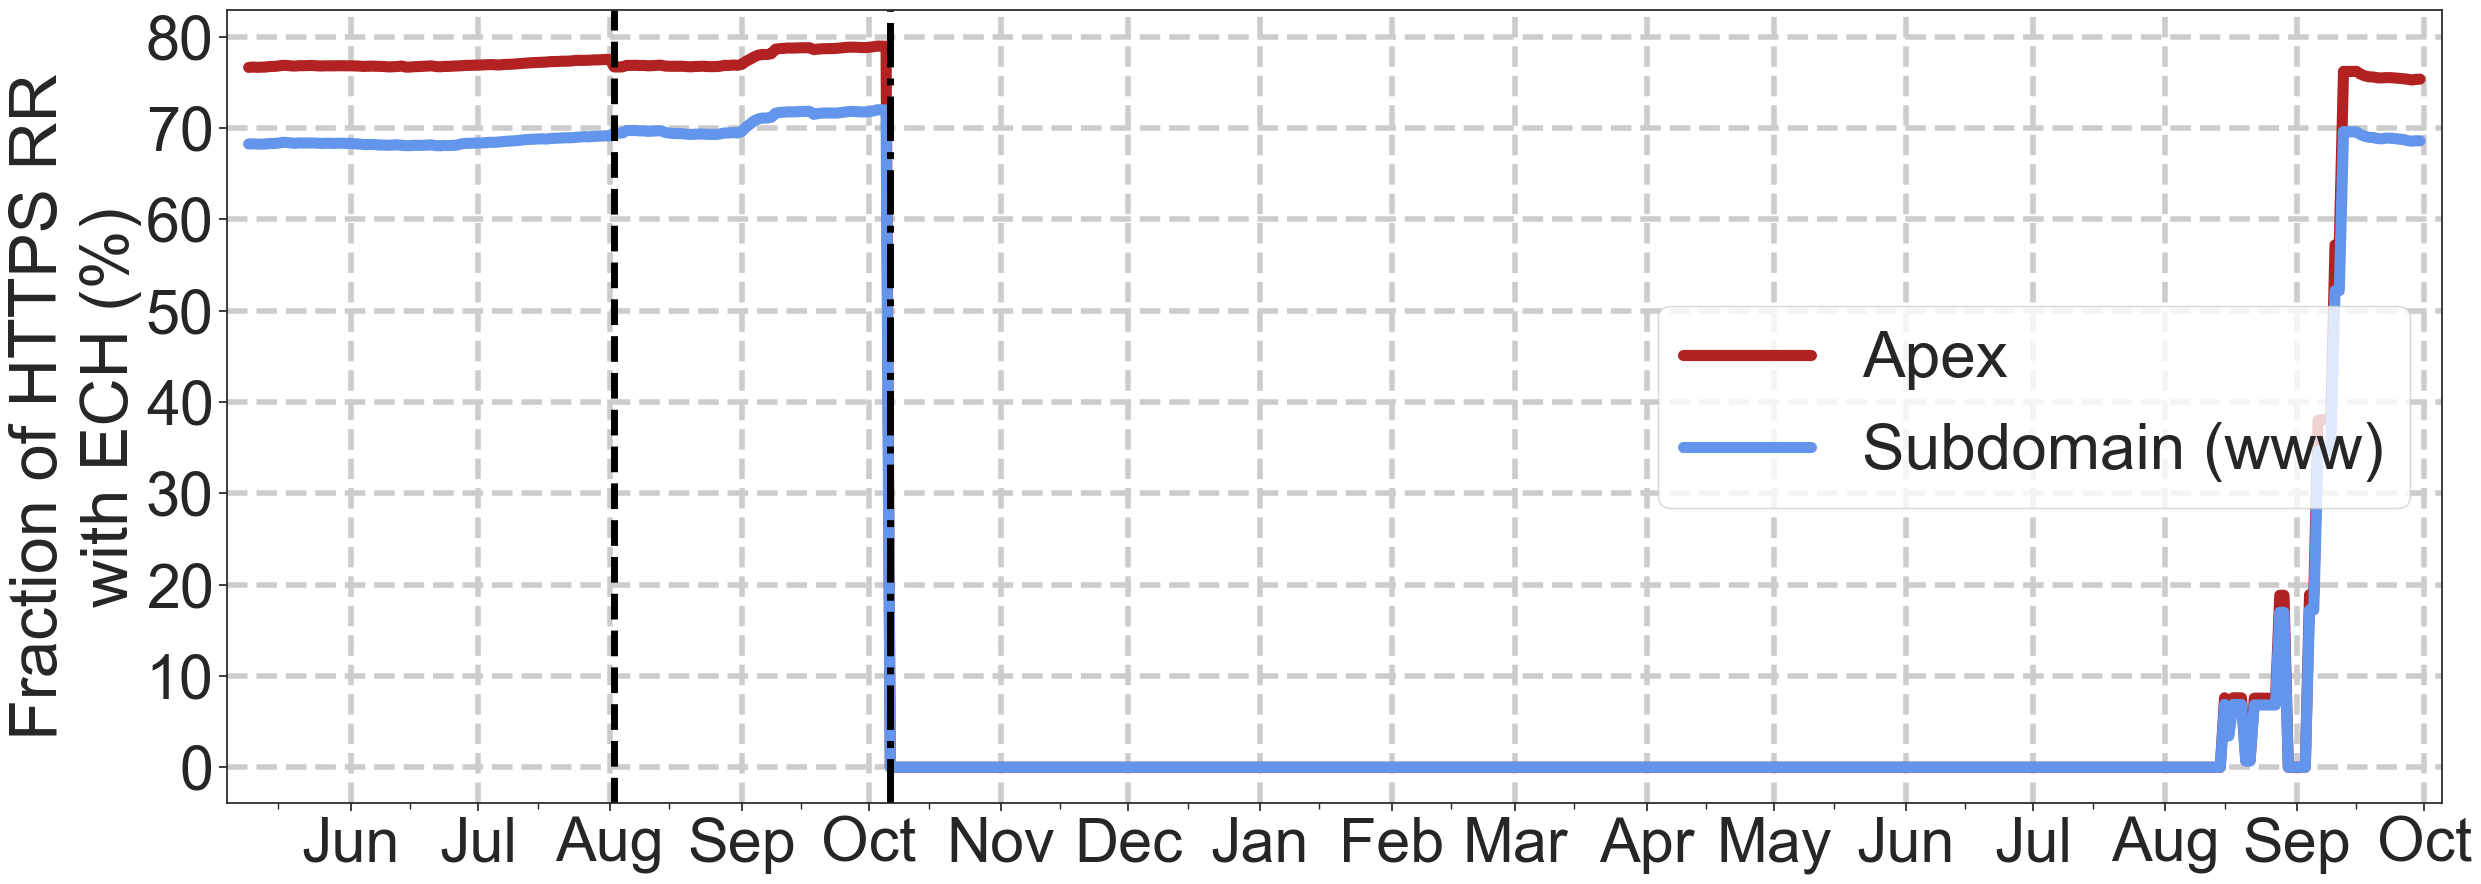

In [27]:
fig = plt.figure(figsize=(25,9))
sns.set(style="ticks")
ax = sns.lineplot(data=ech_apex, x="datetime", y="ech_perc", linewidth=8, color='firebrick', label='Apex')
ax2 = sns.lineplot(data=ech_www, x="datetime", y="ech_perc", linewidth=8, color='cornflowerblue', label='Subdomain (www)')
ax.grid(True, linestyle='--', linewidth=4)

ax.axvline(x=datetime.strptime("2023-08-02", "%Y-%m-%d"), color="black", linestyle="dashed", linewidth=5)
ax.axvline(x=datetime.strptime("2023-10-06", "%Y-%m-%d"), color="black", linestyle="-.", linewidth=5)

#ax.set_xlim(-0.05, 1.05)
#ax.set_ylim(0, 1)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax.set_xlabel('')
ax.set_ylabel("Fraction of HTTPS RR\nwith ECH (%)", fontsize=48, labelpad=3)
ax.tick_params(axis='x')
plt.xticks(fontsize=44)
plt.yticks(fontsize=44)
plt.margins(x=.01)

plt.legend(fontsize=46, loc="center right")
fig.tight_layout()
#fig.savefig('../figures/alldom_ech.png', dpi=200)
plt.show()